In [2]:
import pandas as pd
from matplotlib_venn import venn2, venn3

# CNA

In [3]:
cna = pd.read_csv('TCGA2012/data_CNA.txt', sep='\t', index_col=0)

##### Checking for duplicated samples

In [4]:
cna = cna[cna.columns[1:]]

In [5]:
cna.columns = cna.columns.str.rsplit('-', 1).str[0]

In [6]:
cna_samples = cna.columns

In [11]:
cna_samples[cna_samples.duplicated()]

Index([], dtype='object')

##### Checking for duplicated genes

In [7]:
cna.index[cna.index.duplicated()]

Index([], dtype='object', name='Hugo_Symbol')

In [8]:
with open("cna_samples.txt", "w") as fh:
    for samp in cna_samples:
        fh.write("%s\n"%samp)

In [9]:
cna.to_csv('cna_data.csv')

# RNA

In [12]:
rna = pd.read_csv('TCGA2012/data_expression_median.txt', sep='\t', index_col=0)

##### Checking for duplicated genes

In [13]:
rna.index[rna.index.duplicated()]

Index([], dtype='object', name='Hugo_Symbol')

##### Checking for duplicated samples

In [15]:
rna = rna[rna.columns[1:]]

In [19]:
rna.columns = rna.columns.str.rsplit('-', 1).str[0]

In [20]:
rna.columns[rna.columns.duplicated()]

Index([], dtype='object')

In [21]:
rna_samples = rna.columns

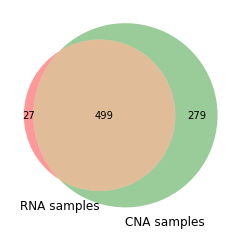

In [23]:
venn2([set(rna_samples), set(cna_samples)], set_labels=['RNA samples', 'CNA samples'])

In [24]:
with open("rna_samples.txt", "w") as fh:
    for samp in rna_samples:
        fh.write("%s\n"%samp)

In [25]:
rna.to_csv('rna_data.csv')

In [38]:
rna_samples

Index(['TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SH', 'TCGA-A1-A0SJ',
       'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SO', 'TCGA-A1-A0SP',
       'TCGA-A2-A04N', 'TCGA-A2-A04P',
       ...
       'TCGA-E2-A15S', 'TCGA-E2-A15T', 'TCGA-E2-A1AZ', 'TCGA-E2-A1B0',
       'TCGA-E2-A1B1', 'TCGA-E2-A1B4', 'TCGA-E2-A1B5', 'TCGA-E2-A1B6',
       'TCGA-E2-A1BC', 'TCGA-E2-A1BD'],
      dtype='object', length=526)

# Protein

In [250]:
prot = pd.read_csv("CPTAC2016/CPTAC_supp3_global_proteome.csv", index_col=0)

##### Genes are not duplicated

In [251]:
prot.index[prot.index.duplicated()]

Index([], dtype='object', name='accession_number')

In [252]:
prot.index[prot.index.isnull()]

Index([], dtype='object', name='accession_number')

In [253]:
prot = prot[prot.columns[11:-3]]

##### There are duplicated patient samples, removing samples with more missing values

In [254]:
prot[prot.columns[('TCGA-' + prot.columns.str.split('.').str[0]).duplicated(keep=False)]].isnull().sum().sort_index()

AO-A12B.01TCGA    1219
AO-A12B.34TCGA    1076
AO-A12D.01TCGA    1219
AO-A12D.05TCGA    1277
C8-A131.01TCGA    1218
C8-A131.32TCGA    1156
dtype: int64

In [255]:
prot = prot.drop(['AO-A12B.01TCGA', 'AO-A12D.05TCGA', 'C8-A131.01TCGA'], axis=1)

In [256]:
prot.columns[('TCGA-' + prot.columns.str.split('.').str[0]).duplicated(keep=False)]

Index([], dtype='object')

In [257]:
prot.columns = ('TCGA-' + prot.columns.str.split('.').str[0])

In [258]:
prot_samples = prot.columns

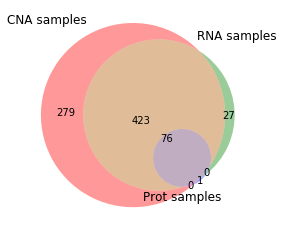

In [259]:
venn3([set(cna_samples), set(rna_samples), set(prot_samples)], set_labels=['CNA samples', 'RNA samples', 'Prot samples'])

In [261]:
prot.to_csv('protein_data.csv')

In [262]:
with open("protein_samples.txt", "w") as fh:
    for samp in prot_samples:
        fh.write("%s\n"%samp)

# Phospho

In [151]:
phospho = pd.read_csv('CPTAC2016/CPTAC_supp4_phosphoproteome.csv')

In [152]:
phospho['index'] = phospho['accession_number']+'-'+phospho['variableSites']

##### Removing exact peptide duplicates

In [173]:
phospho['seq_len'] = phospho['sequence'].str.len()
temp1 = phospho.loc[phospho['index'].duplicated(keep=False), :].sort_values('index')
temp2 = temp1[temp1.groupby(by=['index'])['seq_len'].transform(max) == temp1['seq_len']]

In [179]:
temp2.shape

(961, 141)

In [183]:
temp3 = temp2[temp2.groupby(by=['index'])['bestScore'].transform(max) == temp2['bestScore']]

In [190]:
prot = pd.read_csv("CPTAC2016/CPTAC_supp3_global_proteome.csv", index_col=0)

In [199]:
temp3[temp3['index'].duplicated(keep=False)][prot.columns[11:]].isnull().sum(axis=1)

18105    83
18104    83
40101    21
40100    67
dtype: int64

In [203]:
temp3 = temp3.drop([18105, 40100], axis=0)

In [204]:
temp3[temp3['index'].duplicated(keep=False)]

,accessionNumber_VMsites_numVMsitesPresent_numVMsitesLocalizedBest_earliestVMsiteAA_latestVMsiteAA,numITRAQExperimentsVMsiteObserved,numSpectraVMsiteObserved,bestFilename,bestScore,bestDeltaForwardReverseScore,Best_scoreVML,Best_numPossibleVMsites_STY,Best_numActualVMSites_sty,Best_numLocalizedVMsites_sty,...,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC,index,seq_len


In [208]:
phospho = phospho.drop_duplicates(keep=False, subset='index')

In [210]:
phospho.shape

(61586, 141)

In [211]:
temp3.shape

(544, 141)

In [213]:
phospho.append(temp3).shape

(62130, 141)

In [214]:
phospho = phospho.append(temp3)

In [215]:
phospho[phospho['index'].duplicated()]

,accessionNumber_VMsites_numVMsitesPresent_numVMsitesLocalizedBest_earliestVMsiteAA_latestVMsiteAA,numITRAQExperimentsVMsiteObserved,numSpectraVMsiteObserved,bestFilename,bestScore,bestDeltaForwardReverseScore,Best_scoreVML,Best_numPossibleVMsites_STY,Best_numActualVMSites_sty,Best_numLocalizedVMsites_sty,...,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC,index,seq_len


In [217]:
phospho = phospho.set_index('index')

##### Removing duplicate samples from same patient

In [225]:
phospho = phospho[phospho.columns[28:-4]]

In [233]:
phospho.columns[('TCGA-'+phospho.columns.str.split('.').str[0]).duplicated(keep=False)]

Index(['AO-A12D.01TCGA', 'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'AO-A12D.05TCGA',
       'C8-A131.32TCGA', 'AO-A12B.34TCGA'],
      dtype='object')

In [235]:
phospho[phospho.columns[('TCGA-'+phospho.columns.str.split('.').str[0]).duplicated(keep=False)]].isnull().sum().sort_index()

AO-A12B.01TCGA    33096
AO-A12B.34TCGA    32527
AO-A12D.01TCGA    33079
AO-A12D.05TCGA    33424
C8-A131.01TCGA    33076
C8-A131.32TCGA    45180
dtype: int64

In [238]:
phospho = phospho.drop(['AO-A12B.01TCGA', 'AO-A12D.05TCGA', 'C8-A131.32TCGA'], axis=1)

In [239]:
phospho.columns[('TCGA-'+phospho.columns.str.split('.').str[0]).duplicated(keep=False)]

Index([], dtype='object')

In [240]:
phospho.columns = ('TCGA-'+phospho.columns.str.split('.').str[0])

In [242]:
phospho_samples = phospho.columns

In [243]:
phospho.to_csv('phospho_data.csv')

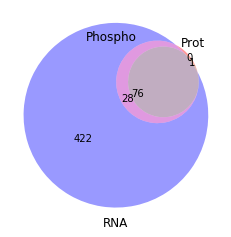

In [245]:
venn3([set(phospho_samples), set(prot_samples), set(rna_samples)], ['Phospho', 'Prot', 'RNA'])

In [246]:
prot_samples.difference(rna_samples)

Index(['TCGA-E2-A15A'], dtype='object')

In [263]:
phospho_samples.difference(rna_samples)

Index(['TCGA-E2-A15A'], dtype='object')

In [269]:
with open("phospho_samples.txt", "w") as fh:
    for samp in phospho_samples:
        fh.write("%s\n"%samp)

# Harmonizing samples

In [268]:
common_samples = (prot_samples.intersection(phospho_samples).intersection(rna_samples).intersection(cna_samples))

In [270]:
datasets = {
    'cna':cna,
    'rna':rna,
    'protein':prot,
    'phospho':phospho
}

In [271]:
for lab, df in datasets.items():
    temp = df[common_samples]
    temp.to_csv('%s_common_samples_data.csv'%lab)

# Annotations for common samples

In [285]:
cptac = pd.read_csv('CPTAC2016/CPTAC_patient_annotations.csv', index_col=1)

In [288]:
cptac.loc[common_samples, :].to_csv('annotations_common_samples.csv')